In [ ]:
!pip install -q contractions nltk gensim
!pip install --no-cache-dir numpy==1.23.5
!pip install --no-cache-dir pandas
import pandas as pd
# Import key packages for data processing and NLP
import pandas as pd
# Import the necessary libraries for text preprocessing
import contractions  # Allows us to handle text contractions (e.g., "can't" -> "cannot")
import re  # Used for finding and replacing text patterns (e.g., removing special characters)
from datetime import datetime  # Provides functions for handling date and time operations

# Import NLTK (Natural Language Toolkit) for text tokenization
import nltk
from nltk.tokenize import word_tokenize  # Tokenizes text into individual words
nltk.download('punkt')  # Downloads the tokenizer model which we'll be using
nltk.download('punkt_tab')

# Import the 'stopwords' corpus from NLTK (Natural Language Toolkit)
from nltk.corpus import stopwords
nltk.download('stopwords')  # Downloads the predefined list of common stopwords from NLTK.

# WordCloud for visualizing the frequency of words in text data
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Library for plotting and visualization

# Libraries for lemmatization (reducing words to their base form)
from nltk.stem import WordNetLemmatizer  # Performs lemmatization
from nltk.corpus import wordnet  # Provides a lexical database for lemmatization
nltk.download('averaged_perceptron_tagger')  # Downloads the model for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')  # Downloads the WordNet lexical database
!pip install --no-cache-dir numpy==1.23.5
!pip install --no-cache-dir gensim
# Libraries for word embeddings (vector representations of words)
import gensim.downloader as api  # Getting our pre-trained word embedding models
import numpy as np  # Numerical computing library for handling arrays and matrices

# package to handle warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Use this if you are running the code on Colab
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/My Drive/HAD7001H Final Project/NLP.xlsx')

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(30, 3)

In [ ]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    if isinstance(text, str):  # Only apply replace if it's a string
        return text.replace('¡¯', "'")
    return text  # Return unchanged if it's not a string (e.g., NaN)


# Apply the cleaning function to the 'tweet' column of the DataFrame.
df['Title'] = df['Title'].apply(clean_encoding)
df.head()
df['Abstract'] = df['Abstract'].apply(clean_encoding)
df.head()
df['Discussion'] = df['Discussion'].apply(clean_encoding)
df.head()

,Title,Abstract,Discussion
0,Fairness and bias correction in machine learni...,A significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...
1,Predicting mental health disparities using mac...,This study examined mental health disparities ...,Our study provides significant insights into t...
2,Can AI Help Reduce Disparities in General Medi...,Abstract\nBackground: As machine learning beco...,NaN
3,Predictive modeling of depression and anxiety ...,Generalized anxiety disorder (GAD) and major d...,Our objective was to evaluate the importance a...
4,Machine learning model to predict mental healt...,The timely identification of patients who are ...,We have demonstrated the feasibility of predic...


In [ ]:
# Expand contractions in the columns
df['Title_expanded'] = df['Title'].apply(lambda x: contractions.fix(x))
df.head()
df['Abstract_expanded'] = df['Abstract'].apply(lambda x: contractions.fix(x))
df.head()
df['Discussionexpanded'] = df['Discussion'].apply(lambda x: contractions.fix(str(x)) if isinstance(x, str) else x)
df.head()

,Title,Abstract,Discussion,Title_expanded,Abstract_expanded,Discussionexpanded
0,Fairness and bias correction in machine learni...,A significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,Fairness and bias correction in machine learni...,A significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...
1,Predicting mental health disparities using mac...,This study examined mental health disparities ...,Our study provides significant insights into t...,Predicting mental health disparities using mac...,This study examined mental health disparities ...,Our study provides significant insights into t...
2,Can AI Help Reduce Disparities in General Medi...,Abstract\nBackground: As machine learning beco...,NaN,Can AI Help Reduce Disparities in General Medi...,Abstract\nBackground: As machine learning beco...,NaN
3,Predictive modeling of depression and anxiety ...,Generalized anxiety disorder (GAD) and major d...,Our objective was to evaluate the importance a...,Predictive modeling of depression and anxiety ...,Generalized anxiety disorder (GAD) and major d...,Our objective was to evaluate the importance a...
4,Machine learning model to predict mental healt...,The timely identification of patients who are ...,We have demonstrated the feasibility of predic...,Machine learning model to predict mental healt...,The timely identification of patients who are ...,We have demonstrated the feasibility of predic...


In [ ]:
df['Title_expanded'] = df['Title_expanded'].str.lower()
df['Abstract_expanded'] = df['Abstract_expanded'].str.lower()
df = df.dropna(subset=['Discussion'])  # Remove rows where 'Discussion' is NaN
df['Discussion_expanded'] = df['Discussion'].apply(lambda x: contractions.fix(x))
df['Discussion_expanded'] = df['Discussion_expanded'].str.lower()

df.head()

,Title,Abstract,Discussion,Title_expanded,Abstract_expanded,Discussionexpanded,Discussion_expanded
0,Fairness and bias correction in machine learni...,A significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,fairness and bias correction in machine learni...,a significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,ml algorithms have achieved state-of-the-art p...
1,Predicting mental health disparities using mac...,This study examined mental health disparities ...,Our study provides significant insights into t...,predicting mental health disparities using mac...,this study examined mental health disparities ...,Our study provides significant insights into t...,our study provides significant insights into t...
3,Predictive modeling of depression and anxiety ...,Generalized anxiety disorder (GAD) and major d...,Our objective was to evaluate the importance a...,predictive modeling of depression and anxiety ...,generalized anxiety disorder (gad) and major d...,Our objective was to evaluate the importance a...,our objective was to evaluate the importance a...
4,Machine learning model to predict mental healt...,The timely identification of patients who are ...,We have demonstrated the feasibility of predic...,machine learning model to predict mental healt...,the timely identification of patients who are ...,We have demonstrated the feasibility of predic...,we have demonstrated the feasibility of predic...
5,Bias Discovery in Machine Learning Models for ...,Fairness and bias are crucial concepts in arti...,"As reported in Table 5, all fairness metrics s...",bias discovery in machine learning models for ...,fairness and bias are crucial concepts in arti...,"As reported in Table 5, all fairness metrics s...","as reported in table 5, all fairness metrics s..."


In [ ]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

df['Title_expanded'] = df['Title_expanded'].apply(remove_special_characters)
df['Abstract_expanded'] = df['Abstract_expanded'].apply(remove_special_characters)
df['Discussion_expanded'] = df['Discussion_expanded'].apply(remove_special_characters)
df.head()

,Title,Abstract,Discussion,Title_expanded,Abstract_expanded,Discussionexpanded,Discussion_expanded
0,Fairness and bias correction in machine learni...,A significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,fairness and bias correction in machine learni...,a significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,ml algorithms have achieved stateoftheart perf...
1,Predicting mental health disparities using mac...,This study examined mental health disparities ...,Our study provides significant insights into t...,predicting mental health disparities using mac...,this study examined mental health disparities ...,Our study provides significant insights into t...,our study provides significant insights into t...
3,Predictive modeling of depression and anxiety ...,Generalized anxiety disorder (GAD) and major d...,Our objective was to evaluate the importance a...,predictive modeling of depression and anxiety ...,generalized anxiety disorder gad and major dep...,Our objective was to evaluate the importance a...,our objective was to evaluate the importance a...
4,Machine learning model to predict mental healt...,The timely identification of patients who are ...,We have demonstrated the feasibility of predic...,machine learning model to predict mental healt...,the timely identification of patients who are ...,We have demonstrated the feasibility of predic...,we have demonstrated the feasibility of predic...
5,Bias Discovery in Machine Learning Models for ...,Fairness and bias are crucial concepts in arti...,"As reported in Table 5, all fairness metrics s...",bias discovery in machine learning models for ...,fairness and bias are crucial concepts in arti...,"As reported in Table 5, all fairness metrics s...",as reported in table all fairness metrics sho...


In [ ]:
def tokenize_text(text):
   return word_tokenize(text)
df['tokens_Title'] = df['Title_expanded'].apply(tokenize_text)
df['tokens_Abstract'] = df['Abstract_expanded'].apply(tokenize_text)
df['tokens_Discussion'] = df['Discussion_expanded'].apply(tokenize_text)
df.head()

,Title,Abstract,Discussion,Title_expanded,Abstract_expanded,Discussionexpanded,Discussion_expanded,tokens_Title,tokens_Abstract,tokens_Discussion
0,Fairness and bias correction in machine learni...,A significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,fairness and bias correction in machine learni...,a significant level of stigma and inequality e...,ML algorithms have achieved state-of-the-art p...,ml algorithms have achieved stateoftheart perf...,"[fairness, and, bias, correction, in, machine,...","[a, significant, level, of, stigma, and, inequ...","[ml, algorithms, have, achieved, stateoftheart..."
1,Predicting mental health disparities using mac...,This study examined mental health disparities ...,Our study provides significant insights into t...,predicting mental health disparities using mac...,this study examined mental health disparities ...,Our study provides significant insights into t...,our study provides significant insights into t...,"[predicting, mental, health, disparities, usin...","[this, study, examined, mental, health, dispar...","[our, study, provides, significant, insights, ..."
3,Predictive modeling of depression and anxiety ...,Generalized anxiety disorder (GAD) and major d...,Our objective was to evaluate the importance a...,predictive modeling of depression and anxiety ...,generalized anxiety disorder gad and major dep...,Our objective was to evaluate the importance a...,our objective was to evaluate the importance a...,"[predictive, modeling, of, depression, and, an...","[generalized, anxiety, disorder, gad, and, maj...","[our, objective, was, to, evaluate, the, impor..."
4,Machine learning model to predict mental healt...,The timely identification of patients who are ...,We have demonstrated the feasibility of predic...,machine learning model to predict mental healt...,the timely identification of patients who are ...,We have demonstrated the feasibility of predic...,we have demonstrated the feasibility of predic...,"[machine, learning, model, to, predict, mental...","[the, timely, identification, of, patients, wh...","[we, have, demonstrated, the, feasibility, of,..."
5,Bias Discovery in Machine Learning Models for ...,Fairness and bias are crucial concepts in arti...,"As reported in Table 5, all fairness metrics s...",bias discovery in machine learning models for ...,fairness and bias are crucial concepts in arti...,"As reported in Table 5, all fairness metrics s...",as reported in table all fairness metrics sho...,"[bias, discovery, in, machine, learning, model...","[fairness, and, bias, are, crucial, concepts, ...","[as, reported, in, table, all, fairness, metri..."


In [ ]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop_Title'] = df['tokens_Title'].apply(remove_stop_words)
df['tokens_no_stop_Abstract'] = df['tokens_Abstract'].apply(remove_stop_words)
df['tokens_no_stop_Discussion'] = df['tokens_Discussion'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['Title', 'tokens_Title', 'tokens_no_stop_Title']].head()


,Title,tokens_Title,tokens_no_stop_Title
0,Fairness and bias correction in machine learni...,"[fairness, and, bias, correction, in, machine,...","[fairness, bias, correction, machine, learning..."
1,Predicting mental health disparities using mac...,"[predicting, mental, health, disparities, usin...","[predicting, mental, health, disparities, usin..."
3,Predictive modeling of depression and anxiety ...,"[predictive, modeling, of, depression, and, an...","[predictive, modeling, depression, anxiety, us..."
4,Machine learning model to predict mental healt...,"[machine, learning, model, to, predict, mental...","[machine, learning, model, predict, mental, he..."
5,Bias Discovery in Machine Learning Models for ...,"[bias, discovery, in, machine, learning, model...","[bias, discovery, machine, learning, models, m..."


In [ ]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['machine', 'learning', 'model', 'predictive', 'mental health', 'dl', 'bd', 'eeg' 'stbs', 'predicting', 'mental', 'health', 'models', 'modeling', 'using', 'data', 'dataset', 'may', 'using', 'clinical', 'studies', 'study', 'patients', 'et', 'al'])

# English stop words
stop_words_set = set(stopwords.words('english')) # At the beginning of the tutorial, we downloaded a predefined set of common stopwords from NLTK /
# in this line, we're getting this predefined set of english stop words.

# Here we will remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words /
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_Title'] = df['tokens_Title'].apply(remove_context_sensitive_stop_words)
df['tokens_no_stop_Abstract'] = df['tokens_Abstract'].apply(remove_context_sensitive_stop_words)
df['tokens_no_stop_Discussion'] = df['tokens_Discussion'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['Title', 'tokens_Title', 'tokens_no_stop_Title']].head()


,Title,tokens_Title,tokens_no_stop_Title
0,Fairness and bias correction in machine learni...,"[fairness, and, bias, correction, in, machine,...","[fairness, bias, correction, depression, predi..."
1,Predicting mental health disparities using mac...,"[predicting, mental, health, disparities, usin...","[disparities, african, americans, southeastern..."
3,Predictive modeling of depression and anxiety ...,"[predictive, modeling, of, depression, and, an...","[depression, anxiety, electronic, records, nov..."
4,Machine learning model to predict mental healt...,"[machine, learning, model, to, predict, mental...","[predict, crises, electronic, records]"
5,Bias Discovery in Machine Learning Models for ...,"[bias, discovery, in, machine, learning, model...","[bias, discovery]"


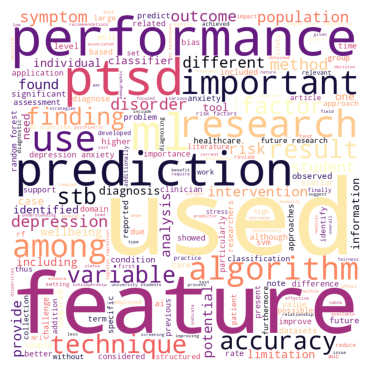

In [ ]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# You can remove .head(5000) if you want to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_Discussion'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_Discussion'].apply(lemmatize_tokens_with_pos)

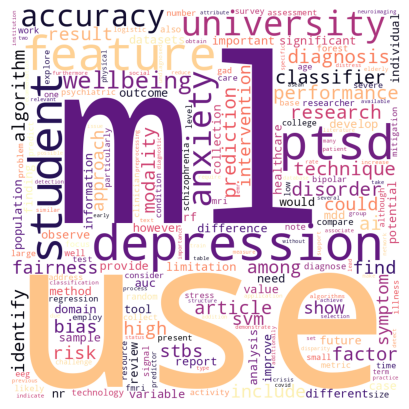

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
docs = [' '.join(tokens) for tokens in df['lemmatized'].head(5000)]

# Create a text string required by WordCloud
# Instead of raw text, we calculate TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
scores = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, scores))

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate_from_frequencies(word_freq)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

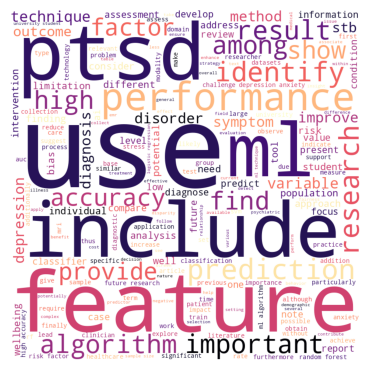

In [ ]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# You can remove .head(5000) if you want to generate the word cloud for the entire dataset
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()